In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2025-09-13 14:37:44.843111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/divyanshu/anaconda3/envs/venv/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size,output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=-0.05,maxval=0.05)
        self.w = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs,self.w)+self.b)

    @property
    def weights(self):
        return self.w,self.b

In [3]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [4]:
model = NaiveSequential([NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
                         NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

In [5]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()


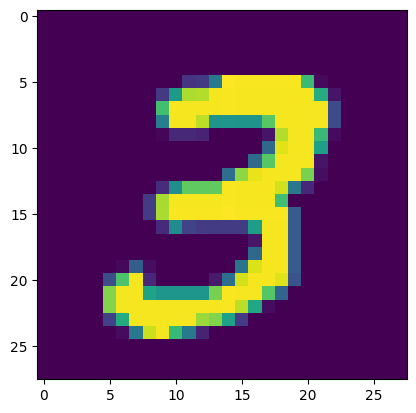

In [6]:
idx=7
plt.imshow(train_images[idx])

In [7]:
train_images = train_images.reshape((len(train_images),28*28)).astype("float32")/255
test_images = test_images.reshape((len(test_images),28*28)).astype("float32")/255


In [8]:
import math

In [9]:
class BatchGenerator:

    def __init__(self, images, label, batch_size=128):
        self.index = 0
        self.images = images
        self.label = label
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images)/batch_size)

    def next(self):
        images = self.images[self.index: self.index+self.batch_size]
        label = self.label[self.index: self.index+self.batch_size]
        self.index += self.batch_size
        return images,label


In [10]:
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=1e-3)

In [11]:


def update_weights(gradients,weights):
    optimizer.apply_gradients(zip(gradients,weights))

In [12]:
def one_training_set(model,images_batch, labels_batch):
    with tf.GradientTape() as tape:
        prediction = model(images_batch)
        per_sample_loss = keras.losses.sparse_categorical_crossentropy(labels_batch,prediction)
        average_loss = tf.reduce_mean(per_sample_loss)
    gradients = tape.gradient(average_loss,model.weights)    
    update_weights(gradients,model.weights)
    return average_loss

In [13]:
def fit(model, images, labels, epochs, batch_size = 128):
    for epoch in range(epochs):
        print(f"Epoch: {epoch}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_set(model, images_batch, labels_batch)
        print(f"Loss: {loss}")


In [14]:
fit(model, train_images,train_labels,epochs=100, batch_size=128)

Epoch: 0
Loss: 2.199734687805176
Epoch: 1
Loss: 2.068112850189209
Epoch: 2
Loss: 1.9260214567184448
Epoch: 3
Loss: 1.773749828338623
Epoch: 4
Loss: 1.6186875104904175
Epoch: 5
Loss: 1.4706660509109497
Epoch: 6
Loss: 1.337325096130371
Epoch: 7
Loss: 1.2220878601074219
Epoch: 8
Loss: 1.124442458152771
Epoch: 9
Loss: 1.042457938194275
Epoch: 10
Loss: 0.9734058976173401
Epoch: 11
Loss: 0.9149531722068787
Epoch: 12
Loss: 0.8650521636009216
Epoch: 13
Loss: 0.8220440745353699
Epoch: 14
Loss: 0.7846837043762207
Epoch: 15
Loss: 0.7519391179084778
Epoch: 16
Loss: 0.7230003476142883
Epoch: 17
Loss: 0.6972536444664001
Epoch: 18
Loss: 0.6742135882377625
Epoch: 19
Loss: 0.6534709334373474
Epoch: 20
Loss: 0.6347311735153198
Epoch: 21
Loss: 0.6177073121070862
Epoch: 22
Loss: 0.6021817326545715
Epoch: 23
Loss: 0.5879636406898499
Epoch: 24
Loss: 0.5749068856239319
Epoch: 25
Loss: 0.5628736019134521
Epoch: 26
Loss: 0.5517545342445374
Epoch: 27
Loss: 0.5414493083953857
Epoch: 28
Loss: 0.5318664312362671
E

In [15]:
predictions = model(test_images).numpy()
predicted_labels = np.argmax(predictions, axis = 1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.92


predicted:4
 actual:4


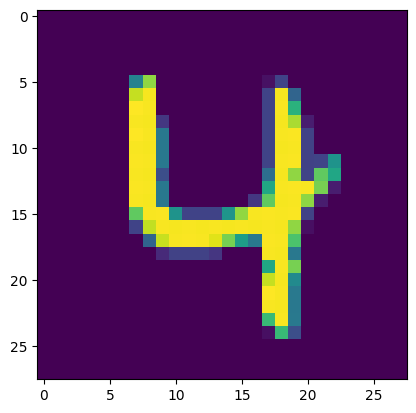

In [16]:
idx = 49
plt.imshow(test_images[idx].reshape(28,28))
print(f"predicted:{predicted_labels[idx]}\n actual:{test_labels[idx]}")